Demonstrate generation of multiple tones

In [1]:
import sys
sys.path.append('../../qick/qick_lib/')
sys.path.append('../soft/')
import Scan
from mkids import *
import matplotlib.pyplot as plt


In [2]:
# After running demo_00_init.ipynb we decide which bitfile we'd like to use
bitfile = "mkids_2x2_kidsim_v2"
scan = Scan.Scan(bitfile)

In [3]:
# Initialize simulation chain
simu = scan.simuChain
simu.analysis.qout(3)
simu.synthesis.qout(3)
simu.alloff()

# Get the kids chain
chain = scan.kidsChain

# Set the mixer of the analysis and synthesis chains to be the same
fMixer = 324
fMixerQ = chain.fq(fMixer)
_ = scan.set_mixer(fMixerQ)

In [4]:
pfb = getattr(chain.soc, chain.synthesis.dict['chain']['pfb'])
N= pfb.dict['N']
chsel = getattr(chain.soc, chain.analysis.dict['chain']['chsel'])


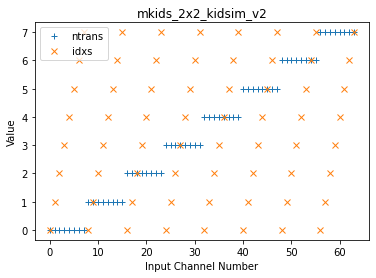

In [5]:
ntrans = np.zeros(N)
idxs = np.zeros(N)
for ch in range(N):
    ntrans[ch],bit = chsel.ch2tran(ch)
    idxs[ch] = chsel.ch2idx(ch)
plt.plot(ntrans,'+',label="ntrans")
plt.plot(idxs,'x',label='idxs')
plt.xlabel("Input Channel Number")
plt.ylabel("Value")
plt.title(bitfile)
plt.legend()

In [6]:
fTone = 314
decimation = 2
g = 0.9

qout = 2
chain.analysis.qout(qout)
chain.synthesis.qout(qout)
freqs = np.array([fTone+12.34, fTone])
fis = 0.123*np.arange(len(freqs))
gs = g*np.ones(len(freqs))/len(freqs)
gs[0] /= 2
cgs = None
print(gs)
chain.set_tones(freqs,fis,gs,cgs, verbose=True)

[0.225 0.45 ]
mkids.py set_tones:  fOffset, fiDeg, g, cg, ch, comp= 2.3399999991059417 0.0 0.225 0.0 0 False
dds.py  AxisDdsDualV1 ddscfg:  f, fi, g, ch, comp= 2339999.9991059415 0.0 0.225 0 False
mkids.py set_tones:  fOffset, fiDeg, g, cg, ch, comp= -0.3999999985098839 7.047380880109126 0.45 0.0 63 False
dds.py  AxisDdsDualV1 ddscfg:  f, fi, g, ch, comp= -399999.9985098839 7.047380880109126 0.45 63 False


In [7]:
def enableChannels(self, verbose):
    chsel = getattr(self.soc, self.analysis.dict['chain']['chsel'])
    chsel.alloff()
    for ch in self.chs:
        print(" ch =",ch)
        chsel.set(ch, single=False, verbose=verbose)
enableChannels(chain, verbose=True)

 ch = 0
axis_chsel_pfb_v3_0: channel = 0
axis_chsel_pfb_v3_0: ch = 0, ntran = 0, bit = 0
axis_chsel_pfb_v3_0: Original Mask: 0, Updated Mask: 1
 ch = 63
axis_chsel_pfb_v3_0: channel = 63
axis_chsel_pfb_v3_0: ch = 63, ntran = 7, bit = 7
axis_chsel_pfb_v3_0: Original Mask: 1, Updated Mask: 129


In [8]:
xs = chain.get_xs() # The first read might have "old" data in the first few samples
xs = chain.get_xs()

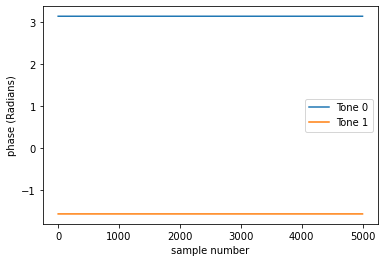

In [9]:
phi0 = np.angle(xs[0])
phi1 = np.angle(xs[1])
plt.plot(phi0, label="Tone 0")
plt.plot(phi1, label="Tone 1")
plt.xlabel("sample number")
plt.ylabel("phase (Radians)")
plt.legend()

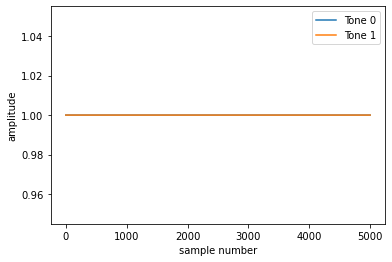

In [10]:
amp0 = np.abs(xs[0])
amp1 = np.abs(xs[1])
plt.plot(amp0, label="Tone 0")
plt.plot(amp1, label="Tone 1")
plt.xlabel("sample number")
plt.ylabel("amplitude")
plt.legend()